In [2]:
%matplotlib inline
import yt
import matplotlib.pyplot as plt
from matplotlib import rc

import numpy as np
import dwarf_model as model
import cgs as cgs
from initial_conditions import ic_list as icl

rc('text',usetex=True)
rc('font',size=17)
#rcParams['figure.figsize'] = (8.0, 6.0)

In [7]:
carina = icl.ic_object_dict['CarinaMidMed']

In [8]:
n_o   = carina.ic['n_o']
rho_o = n_o * carina.ic['mu_dwarf'] * cgs.mp
r_o   = carina.ic['b']
M_gas = 6.6E5 * cgs.Msun
rho_halo = 1.0E-4 * cgs.mp * 0.61
rho_halo = carina.ic['n_halo'] * cgs.mp * carina.ic['mu_halo']
print carina.ic['n_halo']
T_halo = carina.ic['T_halo']
T_dwarf = carina.ic['T_dwarf']

0.00017


In [9]:
orbit_data = np.genfromtxt('./../orbits/carina_orbit_tab.dat')
mass_data = np.genfromtxt('./../plot/CarMedMidMass.dat',names=True)
t = orbit_data[:,0] * cgs.Myr
r = orbit_data[:,1] * cgs.kpc
v = orbit_data[:,2] * cgs.km

In [10]:
M = np.zeros(np.size(t))
M_KH = np.zeros(np.size(t))

M_RPS = np.zeros(np.size(t))

M[0] = M_gas
M_KH[0] = M_gas
M_RPS[0] = M_gas

t_rps = np.zeros(np.size(t))
t_KH = np.zeros(np.size(t))
for i in np.arange(1,np.size(t)):
    
    
    t_rps[i] = model.rps_timescale(rho_halo,rho_o, v[i],r_o)
    t_KH[i]  = model.KH_timescale(M[i-1], r_o, rho_halo, rho_o, v[i], T_halo,T_dwarf)
    
    dt = t[i] - t[i-1]
    
    dM_rps =  M[i-1] * dt/t_rps[i]
    dM_KH  =  M[i-1] * dt/t_KH[i]
    
    M[i] = M[i-1] - dM_rps - dM_KH
    M_RPS[i] = M_RPS[i-1] - M_RPS[i-1] * dt/t_rps[i]
    M_KH[i]  = M_KH[i-1] - M_KH[i-1] * dt/t_KH[i]
    i = i + 1
    
M[M<0] = 0.0 ; t_rps[t_rps<0]=0
M_RPS[M_RPS<0] = 0.0; t_KH[t_KH<0]=0
M_KH[M_KH<0] = 0.0

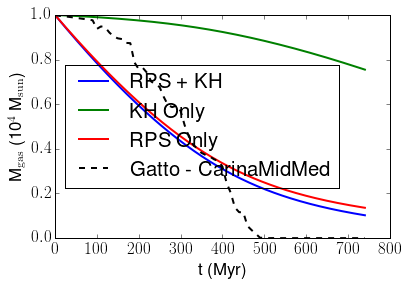

In [14]:
f = 1.0E4
f = M[0] / cgs.Msun

plt.plot(t/cgs.Myr, M/cgs.Msun/f, label = 'RPS + KH',lw=2)
plt.plot(t/cgs.Myr, M_KH/cgs.Msun/f, label='KH Only',lw=2)
plt.plot(t/cgs.Myr, M_RPS/cgs.Msun/f,label='RPS Only',lw=2)

f = mass_data['M'][0]
plt.plot(mass_data['t']*10.0, mass_data['M']/f,label = 'Gatto - CarinaMidMed', lw=2,color='black',ls='--')
plt.legend(loc='best')
plt.ylabel(r'M$_{\rm{gas}}$ (10$^4$ M$_{\rm{sun}}$)')
plt.xlabel(r't (Myr)')
#plt.semilogy()


/home/emerick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


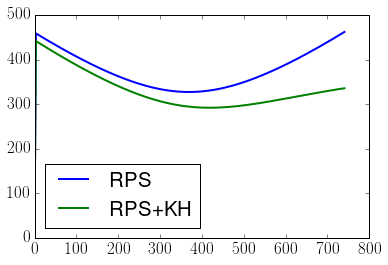

In [16]:
plt.plot(t/cgs.Myr, t_rps/cgs.Myr, label='RPS',lw=2)
#plt.plot(t/cgs.Myr, t_KH/cgs.Myr, label='KH',lw=2)
plt.plot(t/cgs.Myr, (1.0/t_KH + 1.0/t_rps)**(-1) / cgs.Myr, label='RPS+KH',lw=2)
plt.legend(loc='best')
#plt.semilogy()

In [ ]:
int(True)

In [2]:
import numpy as np
print np.linspace( 0.99*321.041, 1.01*321.041, 5)

[ 317.83059   319.435795  321.041     322.646205  324.25141 ]


In [6]:
any([[5,4]>0])

True